# RipVersion_Text_Generator (colab version)

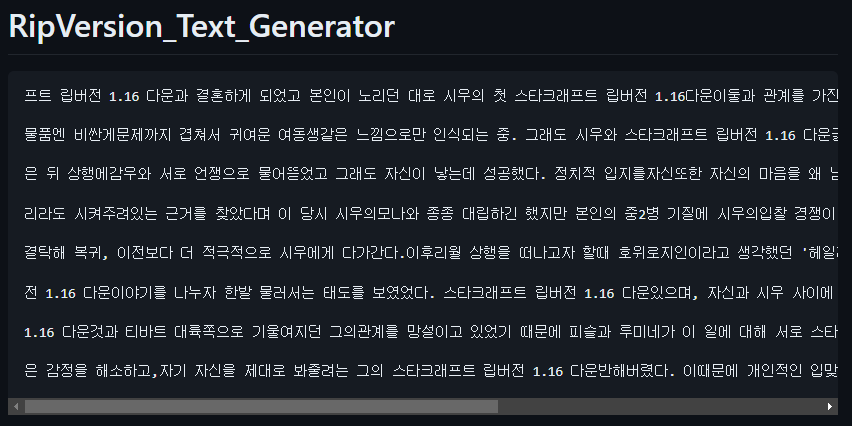

---


### 사용법
1. 좌측의 파일 섹션을 열어, 두 가지의 txt 파일을 업로드합니다.
 - original.txt : 소스 텍스트
 - target.txt : 삽입할 텍스트
2. 아래 코드들을 순차적으로 실행합니다.
3. 하단에 결과물이 출력됩니다.

In [6]:
import random as rd

class RIPVERSION_TEXT_GENERATOR :

    def __init__(self, original_text_path, target_text_path, output_text_path, min_corpus_size=5, delete_rate=0.1, target_rate=0.1, per_line_size=100, total_line=8) -> None:

        self.paths = {
            "ORIGINAL_TEXT" : original_text_path,
            "TARGET_TEXT" : target_text_path,
            "OUTPUT_TEXT" : output_text_path,
        }
        self.min_corpus_size = min_corpus_size
        self.delete_rate = delete_rate
        self.target_rate = target_rate
        self.per_line_size = per_line_size
        self.total_line = total_line

        self.enough_size = 1

        self.original_text = ""
        self.target_text = ""
        self.final_text = ""

        self.errors = {
            "SHORT_ORIGINAL_TEXT" : "Original text length is not enough for generating output text.",
            "NOT_VALID_PARAMETERS" : "Parameters are not valid.",
            "NOT_EXISTING_FILE" : "File not exist.",
        }

    def _fast_concat(self, target_list) :
        return "".join([ele.strip() for ele in target_list])

    def _load_data(self) :
        
        try :
            with open(self.paths["ORIGINAL_TEXT"], "r", encoding="UTF8") as f :
                
                self.original_text = self._fast_concat(f.readlines())
                self.enough_size += self.delete_rate / (len(self.original_text) - self.delete_rate)

                if (len(self.original_text) <  self.per_line_size * self.total_line * self.enough_size ) :
                    self._print_log(self.errors["SHORT_ORIGINAL_TEXT"])
                    return 0
                
                self.original_text = self.original_text.split()

            with open(self.paths["TARGET_TEXT"], "r", encoding="UTF8") as f :
                self.target_text = f.readline()

        except FileNotFoundError :
            self._print_log(self.errors["NOT_EXISTING_FILE"])
            return 0

        return 1

    def __repr__(self) -> str:
        return "RIP VERSION TEXT GENERATOR OBJECT\n"

    def _print_log(self, log) :
        print(log)

    def _parse_line(self, corpus_size) -> str :
        
        true_corpus_size = rd.randint(corpus_size, corpus_size*2)
        entry_idx = rd.randint(0, len(self.original_text) - true_corpus_size)
        result = []

        for i in range(true_corpus_size) :
            result.append(self.original_text.pop(entry_idx)) 

        return result

    def _export_data(self) :

        all_lines = []
        startidx = endidx = 0

        for i in range(self.total_line) :            
            endidx += self.per_line_size
            if (i+1 == self.total_line) : all_lines.append(self.final_text[startidx:])
            else : all_lines.append(self.final_text[startidx:endidx])
            startidx = endidx

        with open(self.paths["OUTPUT_TEXT"], "w", encoding="UTF8") as f :
            for line in all_lines :
                f.write(line + "\n\n")

    def _is_valid_params(self) :

        if (self.delete_rate < 0 or self.delete_rate > 0.5) :
            self._print_log(self.errors["NOT_VALID_PARAMETERS"])
            return 0
        
        if (self.target_rate < 0 or self.target_rate >= 1) :
            self._print_log(self.errors["NOT_VALID_PARAMETERS"])
            return 0

        return 1

    def run(self) :
        
        if not self._is_valid_params() :
            return

        if not self._load_data() :
            return
        
        while (len(self.final_text) < self.per_line_size * self.total_line) :
            
            parsed_line = self._parse_line(self.min_corpus_size)

            if ( rd.random() < self.target_rate ) :
                parsed_line.append(self.target_text)

            if ( rd.random() < self.delete_rate ) :
                parsed_line.pop(rd.randint(0, len(parsed_line)-1))

            self.final_text += " ".join(parsed_line)

    def print_output(self) :
        
        startidx = endidx = 0

        for i in range(self.total_line) :            
            endidx += self.per_line_size
            if (i+1 == self.total_line) :
                print(self.final_text[startidx:])
            else :
                print(self.final_text[startidx:endidx])
            startidx = endidx


### 파라미터 설명

필요시 변경해서 사용하세요.

```
PATH_ORIGINAL_TEXT = "original.txt"    // 원본 문장 파일 경로
PATH_TARGET_TEXT = "target.txt"        // 타겟 문장 파일 경로
PATH_OUTPUT = "output.txt"             // 출력 문장 파일 경로

입출력 경로입니다.
필요시 이름을 변경하여 사용하세요.
```


```
MIN_CORPUS_SIZE = 5                         // 최소 문장 단위

원본 전체에서 MIN_CORPUS_SIZE개의 어절을 랜덤으로 샘플링합니다.
숫자가 커질수록 사이사이의 이해 가능한 텍스트가 길어집니다.
```


```
DELETE_RATE = 0.1                           // 랜덤 단어 삭제 빈도 [0 ~ 0.5]

샘플링된 문장의 일부를 DELETE_RATE 확률만큼 삭제합니다.
0부터 0.5의 값을 가지며, 커질수록 문장이 더 많이 손상됩니다.
```

```
TARGET_RATE = 0.3                           // 타겟 문장 포함 빈도 [0, 1)

타겟 문장이 TARGET_RATE의 확률만큼 포함됩니다.
0에서 1 사이의 값을 가지며, 커질수록 삽입 텍스트가 자주 등장합니다.

```

```
PER_LINE_SIZE = 100                         // 출력 줄당 글자 개수

한 줄에 출력될 글자의 개수입니다. (띄어쓰기 포함)
```

```
TOTAL_LINE = 8                              // 출력 줄 개수

전체 출력될 줄 수입니다.
```

- 주의사항 : 원본 텍스트의 글자수는 최소 PER_LINE_SIZE * TOTAL_LINE 보다 커야 합니다.
> PER_LINE_SIZE = 100, TOTAL_LINE = 8 (총 8줄, 줄당 100글자)면, 원본 텍스트는 최소 800자 이상이어야 합니다.

In [ ]:
## ============================================================
## 필요시 이 사이의 값들을 변경 ===============================
PATH_ORIGINAL_TEXT = "original.txt"
PATH_TARGET_TEXT = "target.txt"
PATH_OUTPUT = "output.txt"

MIN_CORPUS_SIZE = 5

DELETE_RATE = 0.5

TARGET_RATE = 0.5

PER_LINE_SIZE = 100

TOTAL_LINE = 8
## 필요시 이 사이의 값들을 변경 ===============================
## ============================================================

generator = RIPVERSION_TEXT_GENERATOR(PATH_ORIGINAL_TEXT, PATH_TARGET_TEXT, PATH_OUTPUT, MIN_CORPUS_SIZE, DELETE_RATE, TARGET_RATE, PER_LINE_SIZE, TOTAL_LINE)
generator.run()
generator.print_output()

### 오류 메시지 해결법

- **"Original text length is not enough for generating output text."**
> 원본 텍스트를 충분히 넣어주세요. 최소 PER_LINE_SIZE*TOTAL_LINE 개 이상의 글자수를 넘어야 합니다.

- **"Parameters are not valid."**
> 파라미터가 유효하지 않습니다. 넣은 파라미터의 범위를 확인하세요.

- **"File not exist."**
> 파일이 존재하지 않습니다. 파일 경로를 다시 확인해주세요.